# Working with multiple stocks

### Load Stock Data

In [1]:
%matplotlib inline

import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [2]:
# Define a date range
dates = pd.date_range('2017-01-01', '2017-07-31')

# Choose stock symbols to read
symbols = ['googl', 'ibm', 'gld']

df = pd.DataFrame(index=dates)

In [3]:
# Fill dataframw with stock data (close) for given symbols 

if 'spy' not in symbols:  # add SPY for reference, if absent
    symbols.insert(0, 'spy')

for sym in symbols:
    df_temp = pd.read_csv("data/{}.csv".format(sym), index_col='Date', parse_dates=True, 
                          usecols=['Date', 'Close'], na_values=['nan'])
    df_temp = df_temp.rename(columns = {'Close': sym})
    df = df.join(df_temp)
    if sym == 'spy': # drop dates SPY did not trade
        df = df.dropna(subset=["spy"])     

df.head()

,spy,googl,ibm,gld
2017-01-03,225.24,808.01,167.19,110.47
2017-01-04,226.58,807.77,169.26,110.86
2017-01-05,226.40,813.02,168.70,112.58
2017-01-06,227.21,825.21,169.53,111.75
2017-01-09,226.46,827.18,167.65,112.67


In [4]:
# selection
df.loc['2017-07-12':'2017-07-15',['googl','ibm']]

,googl,ibm
2017-07-12,967.66,153.70
2017-07-13,968.85,153.63
2017-07-14,976.91,154.24


### Visualize data

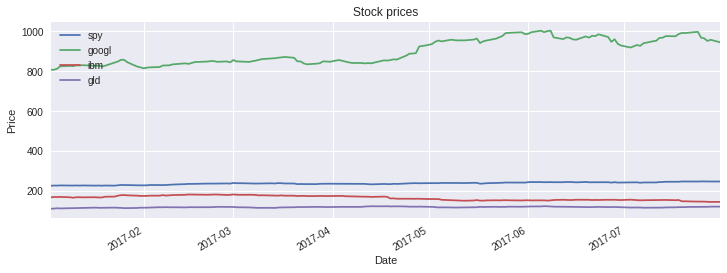

In [5]:
# plot stock prices
def plot_stock(data, title="Stock prices", label=""):    
    ax = data.plot(title=title, label=label, figsize=(12,4))
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    ax.legend(loc='upper left')

plot_stock(df)

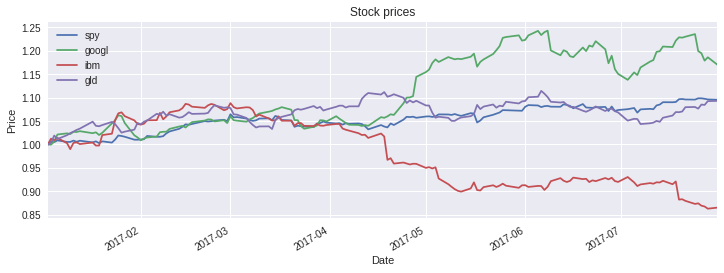

In [6]:
# normalize data based on fist row
normalized_df = df / df.iloc[0]
plot_stock(normalized_df)

### Statistics

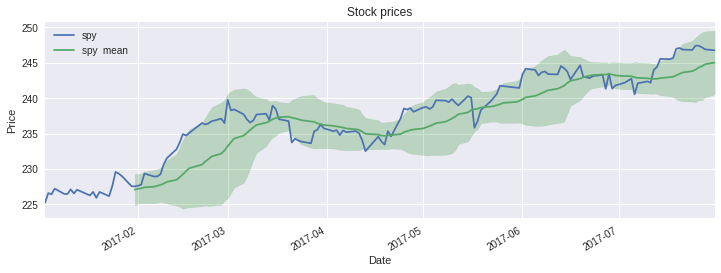

In [48]:
# Rolling window
rolling_spy = df['spy'].rolling(window=20, center=False)
rm_spy = rolling_spy.mean()
rstd_spy = rolling_spy.std()

plot_stock(df['spy'], label='spy')
plot_stock(rm_spy, label='spy rolling mean')
plt.fill_between(rm_spy.index, rm_spy - 2 * rstd_spy, rm_spy + 2 * rstd_spy, color='g', alpha=0.2)

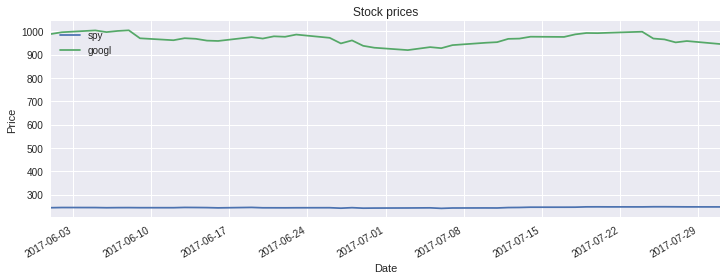

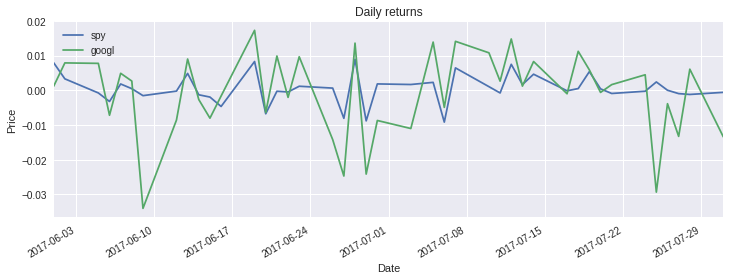

In [49]:
# Daily returns

daily_returns = (df/df.shift(1)) - 1
daily_returns.iloc[0,:] = 0
plot_stock(df.loc['2017-06-01':'2017-07-31',['spy','googl']])
plot_stock(daily_returns.loc['2017-06-01':'2017-07-31',['spy','googl']], title='Daily returns')

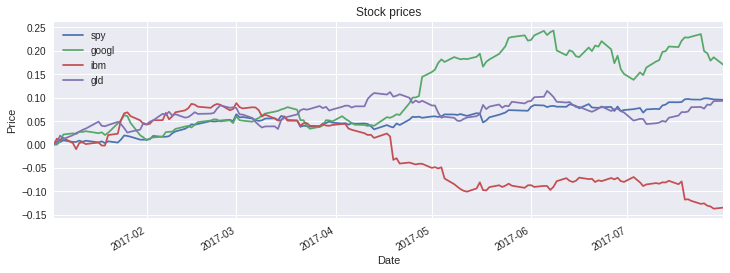

In [51]:
# Cumulative returns
cumulative_df = normalized_df - 1
plot_stock(cumulative_df)